## Questions
Who is at risk of having a heart attack?
What is the biggest factor playing into being at risk?


 -   Find your favourite dataset
 -   Describe origin and specification of these data
 -   Find 2 research questions (prediction context)
 -   Plot variables of interest (both 1- and 2-variable plots)
 -   Interpret plots
 -   Fit tree, random forest to answer questions
 -   Describe performance (validation, train/test, cross validation)
 -   Compare with linear model (or logistic linear model)

In [1]:
# Step 1: Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_squared_error, f1_score, recall_score
)

from math import sqrt

In [2]:
# Step 2: Load and Describe Dataset
heart_data = pd.read_csv("Data/heart.csv")

print("First 5 rows of the dataset:")
print(heart_data.head())

print("\nDataset Info:")
print(heart_data.info())

print("\nDataset Description:")
print(heart_data.describe())

# Check for missing values
print("Missing values in each column:")
print(heart_data.isnull().sum())

First 5 rows of the dataset:
   age  sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  caa  \
0   63    1   3     145   233    1        0      150     0      2.3    0    0   
1   37    1   2     130   250    0        1      187     0      3.5    0    0   
2   41    0   1     130   204    0        0      172     0      1.4    2    0   
3   56    1   1     120   236    0        1      178     0      0.8    2    0   
4   57    0   0     120   354    0        1      163     1      0.6    2    0   

   thall  output  
0      1       1  
1      2       1  
2      2       1  
3      2       1  
4      2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-

In [65]:
# Step 3: Define Research Questions
# 1. What are the key features that influence heart attack prediction the most?
# 2. How well do machine learning models perform in predicting heart attack risks based on key features?

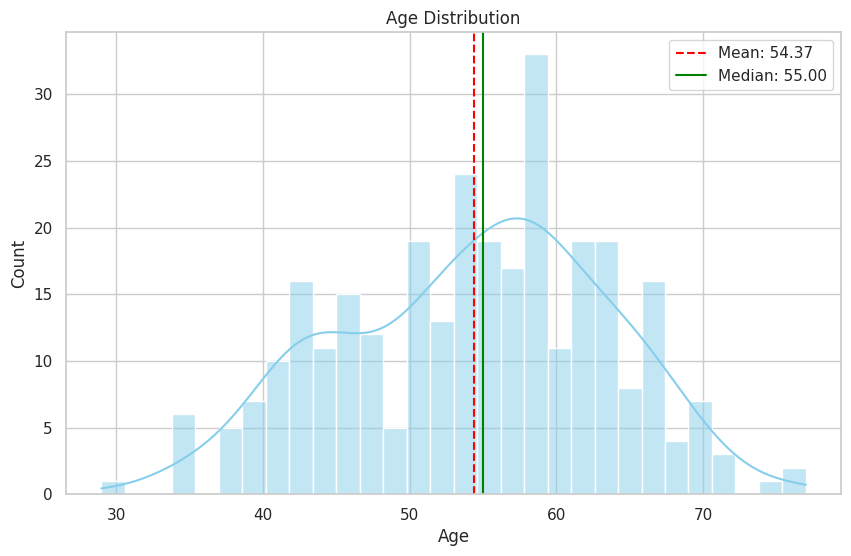

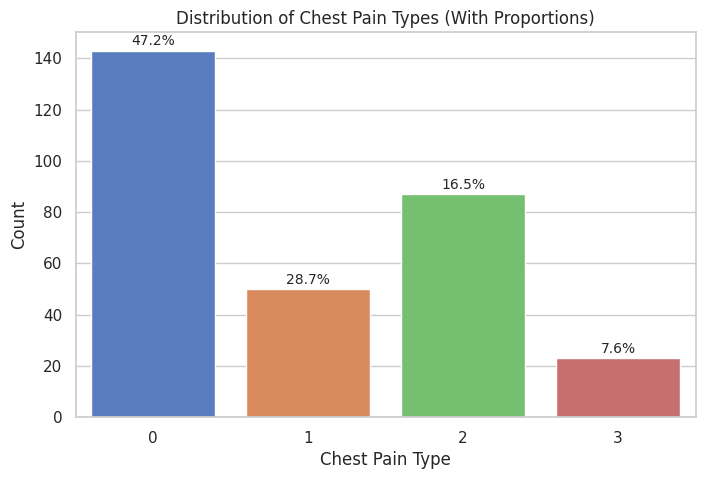

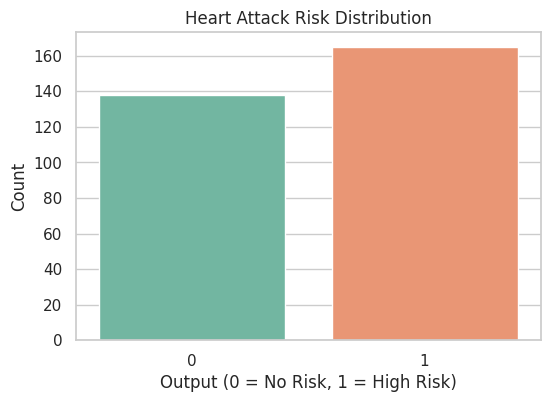

In [5]:
# Step 4: Exploratory Data Analysis (EDA)
## 4.1 Univariate Analysis (Single-variable plots)
# Age Distribution with Mean and Median
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
mean_age = heart_data['age'].mean()
median_age = heart_data['age'].median()
sns.histplot(heart_data['age'], bins=30, kde=True, color='skyblue')
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', label=f'Median: {median_age:.2f}')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

# Maximum Heart Rate Achieved
# plt.figure(figsize=(10, 6))
# mean_thalach = heart_data['thalach'].mean()
# sns.histplot(heart_data['thalach'], bins=30, kde=True, color='lightcoral')
# plt.axvline(mean_thalach, color='blue', linestyle='--', label=f'Mean: {mean_thalach:.2f}')
# plt.title("Maximum Heart Rate Achieved")
# plt.xlabel("Maximum Heart Rate")
# plt.ylabel("Count")
# plt.legend()
# plt.show()

# Chest Pain Type Distribution with Proportions
plt.figure(figsize=(8, 5))
cp_counts = heart_data['cp'].value_counts(normalize=True) * 100
sns.countplot(x='cp', data=heart_data, hue='cp', palette='muted', legend=False)  # Fix here
for i, value in enumerate(cp_counts):
    plt.text(i, cp_counts[i] / 100 * len(heart_data) + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
plt.title("Distribution of Chest Pain Types (With Proportions)")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

# Target Variable Distribution (Heart Attack Risk)
plt.figure(figsize=(6, 4))
sns.countplot(x='output', data=heart_data, hue='output', palette='Set2', legend=False)  # Fix here
plt.title("Heart Attack Risk Distribution")
plt.xlabel("Output (0 = No Risk, 1 = High Risk)")
plt.ylabel("Count")
plt.show()

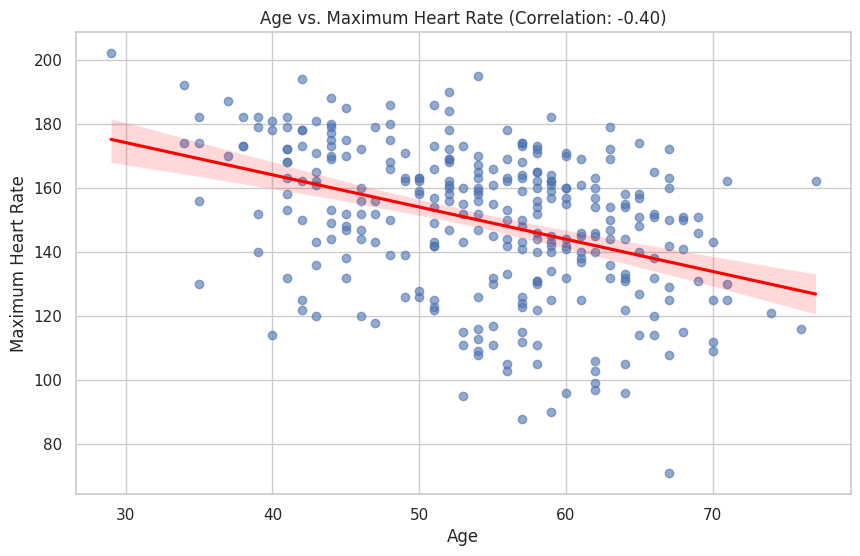

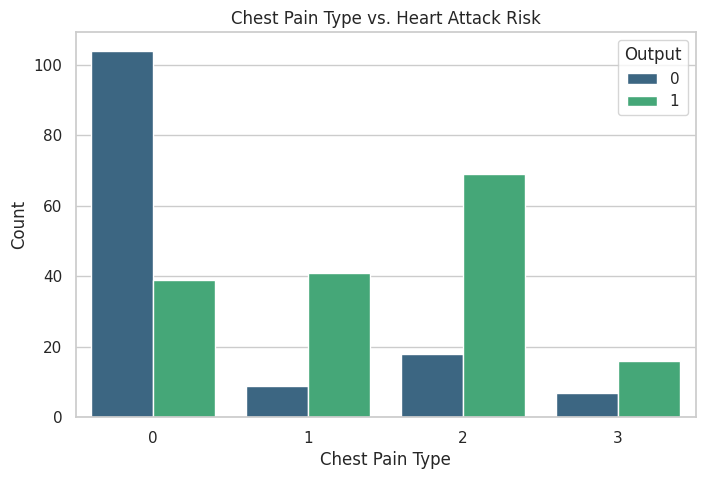

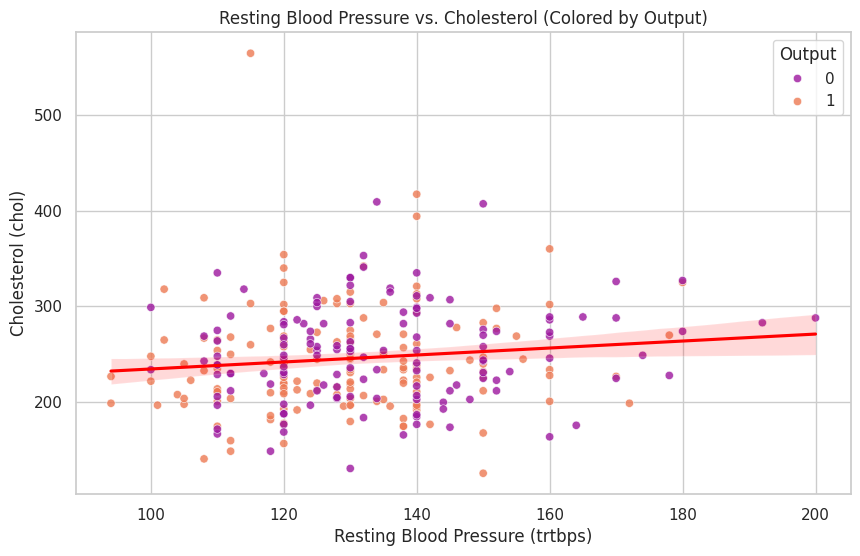

In [6]:
## 4.2 Bivariate Analysis (Two-variable plots)
# Age vs. Maximum Heart Rate with Regression Line and Correlation Coefficient
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='thalach', data=heart_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
correlation = heart_data['age'].corr(heart_data['thalach'])
plt.title(f"Age vs. Maximum Heart Rate (Correlation: {correlation:.2f})")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Chest Pain Type vs. Heart Attack Risk
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='output', data=heart_data, palette='viridis')
plt.title("Chest Pain Type vs. Heart Attack Risk")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Output")
plt.show()

# Resting Blood Pressure vs. Cholesterol (Colored by Output)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trtbps', y='chol', hue='output', data=heart_data, palette='plasma', alpha=0.8)
sns.regplot(x='trtbps', y='chol', data=heart_data, scatter=False, line_kws={'color': 'red'})
plt.title("Resting Blood Pressure vs. Cholesterol (Colored by Output)")
plt.xlabel("Resting Blood Pressure (trtbps)")
plt.ylabel("Cholesterol (chol)")
plt.legend(title="Output")
plt.show()

# Slope of Peak ST Segment vs. Heart Attack Risk
# plt.figure(figsize=(8, 5))
# sns.countplot(x='slp', hue='output', data=heart_data, palette='cubehelix')
# plt.title("Slope of Peak ST Segment vs. Heart Attack Risk")
# plt.xlabel("Slope of Peak ST Segment")
# plt.ylabel("Count")
# plt.legend(title="Output")
# plt.show()

In [7]:
# Step 5: Data Preparation
# Separate features (X) and target (y)
X = heart_data.drop('output', axis=1)
y = heart_data['output']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} rows - {X_train.shape[0]/heart_data.__len__()*100}%")
print(f"Test set size: {X_test.shape[0]} rows - {X_test.shape[0]/heart_data.__len__()*100}%")

Training set size: 242 rows - 79.86798679867987%
Test set size: 61 rows - 20.13201320132013%


In [8]:
# Step 6: Train Models
# 6.1 Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# 6.2 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 6.3 Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [10]:
# Step 7: Model Performance Evaluation
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
evaluate_model("Decision Tree", y_test, dt_preds)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
evaluate_model("Random Forest", y_test, rf_preds)

# Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
evaluate_model("Logistic Regression", y_test, lr_preds)


Decision Tree Performance:
Accuracy: 0.7540983606557377
F1 Score: 0.7368421052631579
Recall: 0.65625
MSE: 0.2459016393442623
RMSE: 0.4958847036804647
Confusion Matrix:
 [[25  4]
 [11 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61


Random Forest Performance:
Accuracy: 0.8360655737704918
F1 Score: 0.84375
Recall: 0.84375
MSE: 0.16393442622950818
RMSE: 0.40488816508945796
Confusion Matrix:
 [[24  5]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84     

In [18]:
# Required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, mean_squared_error
from sklearn.utils import resample

# Define your evaluate function
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"F1 Score: {f1_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False)}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("-" * 50)

# Handle class imbalance with oversampling
def oversample_data(X, y):
    # Combine X and y for resampling
    data = X.copy()
    data['target'] = y

    # Separate majority and minority classes
    majority = data[data['target'] == 0]
    minority = data[data['target'] == 1]

    # Upsample the minority class
    minority_upsampled = resample(minority,
                                  replace=True,  # Sample with replacement
                                  n_samples=len(majority),  # Match majority class size
                                  random_state=42)

    # Combine majority and upsampled minority
    upsampled_data = pd.concat([majority, minority_upsampled])

    # Separate features and target
    X_upsampled = upsampled_data.drop('target', axis=1)
    y_upsampled = upsampled_data['target']

    return X_upsampled, y_upsampled

# Oversample the training data
X_train_upsampled, y_train_upsampled = oversample_data(X_train.copy(), y_train.copy())

# Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1')
dt_grid.fit(X_train_upsampled, y_train_upsampled)
best_dt_model = dt_grid.best_estimator_
dt_preds = best_dt_model.predict(X_test)
evaluate_model("Tuned Decision Tree", y_test, dt_preds)

# Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1')
rf_grid.fit(X_train_upsampled, y_train_upsampled)
best_rf_model = rf_grid.best_estimator_
rf_preds = best_rf_model.predict(X_test)
evaluate_model("Tuned Random Forest", y_test, rf_preds)

# Logistic Regression with scaling
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['saga']  # Saga supports elasticnet
}
lr_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('grid', GridSearchCV(LogisticRegression(max_iter=2000, class_weight='balanced'), lr_param_grid, cv=5, scoring='f1'))
])
lr_pipeline.fit(X_train_upsampled, y_train_upsampled)
best_lr_model = lr_pipeline.named_steps['grid'].best_estimator_
lr_preds = best_lr_model.predict(X_test)
evaluate_model("Tuned Logistic Regression", y_test, lr_preds)

# Cross-Validation Scores for the Best Model
best_models = {
    "Decision Tree": best_dt_model,
    "Random Forest": best_rf_model,
    "Logistic Regression": best_lr_model
}
for name, model in best_models.items():
    scores = cross_val_score(model, X_train_upsampled, y_train_upsampled, cv=5, scoring='accuracy')
    print(f"{name} Cross-validated Accuracy: {scores.mean():.4f}")


Tuned Decision Tree Performance:
Accuracy: 0.7049180327868853
F1 Score: 0.6538461538461539
Recall: 0.53125
MSE: 0.29508196721311475
RMSE: 0.5432144762551112
Confusion Matrix:
 [[26  3]
 [15 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.90      0.74        29
           1       0.85      0.53      0.65        32

    accuracy                           0.70        61
   macro avg       0.74      0.71      0.70        61
weighted avg       0.75      0.70      0.70        61

--------------------------------------------------


/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Tuned Random Forest Performance:
Accuracy: 0.8360655737704918
F1 Score: 0.8387096774193549
Recall: 0.8125
MSE: 0.16393442622950818
RMSE: 0.40488816508945796
Confusion Matrix:
 [[25  4]
 [ 6 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

--------------------------------------------------
Tuned Logistic Regression Performance:
Accuracy: 0.47540983606557374
F1 Score: 0.0
Recall: 0.0
MSE: 0.5245901639344263
RMSE: 0.7242859683401482
Confusion Matrix:
 [[29  0]
 [32  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      1.00      0.64        29
           1       0.00      0.00      0.00        32

    accuracy                     

/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X

Decision Tree Cross-validated Accuracy: 0.8257
Random Forest Cross-validated Accuracy: 0.8760


/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Cross-validated Accuracy: 0.7937


/home/asilarda/DSAI/pythonProject/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
# Step 8: Cross-validation
def cross_validate_model(model, X, y, model_name):
    """Perform cross-validation and print results."""
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"\n{model_name} Cross-Validation Results:")
    print("Accuracy scores:", scores)
    print("Mean Accuracy:", np.mean(scores))

cross_validate_model(dt_model, X, y, "Decision Tree")
cross_validate_model(rf_model, X, y, "Random Forest")
cross_validate_model(lr_model, X, y, "Logistic Regression")


Decision Tree Cross-Validation Results:
Accuracy scores: [0.75409836 0.85245902 0.75409836 0.7        0.71666667]
Mean Accuracy: 0.755464480874317

Random Forest Cross-Validation Results:
Accuracy scores: [0.81967213 0.8852459  0.83606557 0.85       0.8       ]
Mean Accuracy: 0.8381967213114756

Logistic Regression Cross-Validation Results:
Accuracy scores: [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean Accuracy: 0.8282513661202187


/tmp/ipykernel_76530/3185993221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='Set2')


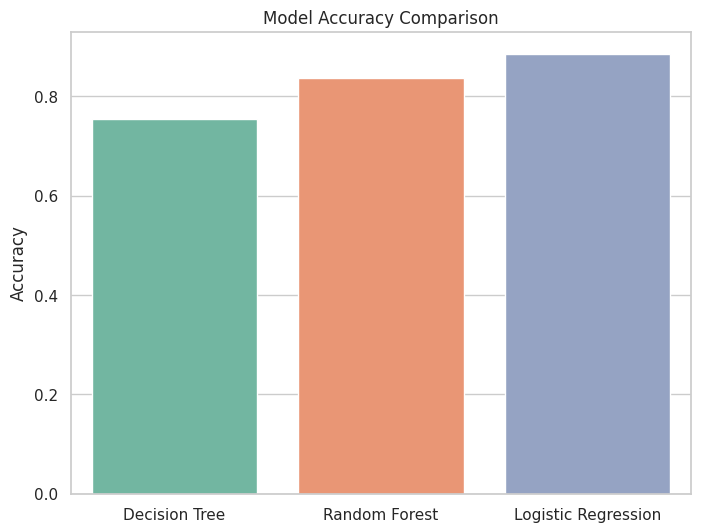

In [15]:
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
accuracy = [accuracy_score(y_test, dt_preds), accuracy_score(y_test, rf_preds), accuracy_score(y_test, lr_preds)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy, palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

/tmp/ipykernel_76530/639505559.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


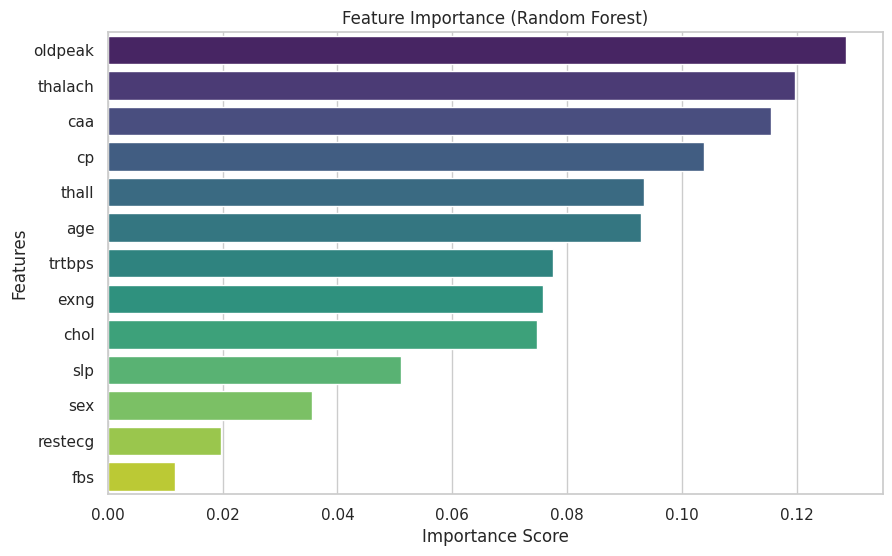

In [17]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


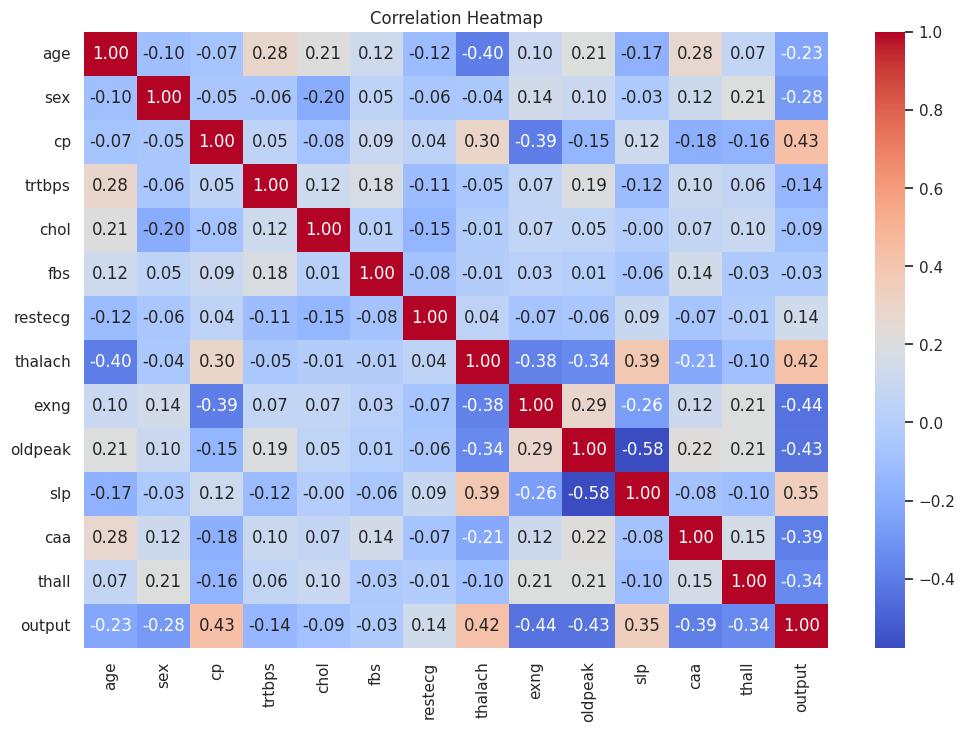

In [88]:
plt.figure(figsize=(12, 8))
corr_matrix = heart_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

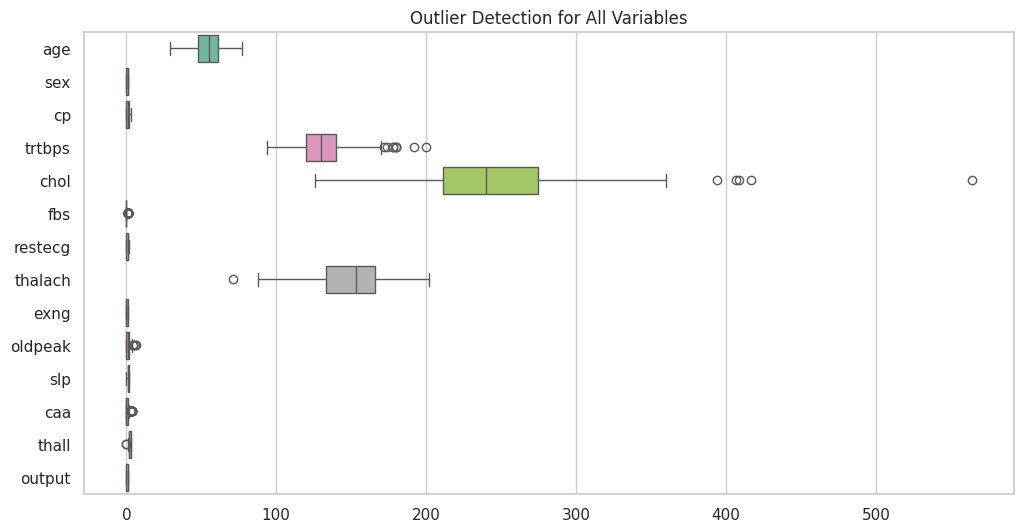

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=heart_data, orient='h', palette='Set2')
plt.title('Outlier Detection for All Variables')
plt.show()